<a href="https://colab.research.google.com/github/huggoparcelly/exercicio-vdd/blob/main/Lab4_HuggoParcelly_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização de dados geográficos

## Análise dos países que receberam o maior número de refugiados da Ucrânia e possível relação com a proximidade geográfica com o território ucraniano.

## Download dataset
 - ukraine russian refugees

In [381]:
!gdown 1xiUY7hIPnwB0cd6ldi--drp5sOWiUAi6

Downloading...
From: https://drive.google.com/uc?id=1xiUY7hIPnwB0cd6ldi--drp5sOWiUAi6
To: /content/ukraine-russia-refugees-2024.csv
100% 1.29k/1.29k [00:00<00:00, 5.11MB/s]


## Download shapefile
- world administrative boundaries

In [382]:
!gdown 1xyfl03XjNe7-iXDqKmp6jvkt0JT9Oa6N

Downloading...
From: https://drive.google.com/uc?id=1xyfl03XjNe7-iXDqKmp6jvkt0JT9Oa6N
To: /content/world-administrative-boundaries-shapefile.zip
100% 2.01M/2.01M [00:00<00:00, 138MB/s]


## Descompactando o Shapefile

In [383]:
import zipfile

with zipfile.ZipFile('world-administrative-boundaries-shapefile.zip', 'r') as zip_ref:
    zip_ref.extractall('world-administrative-boundaries-shapefile')

## Instalação da biblioteca Geopandas


In [384]:
!pip install geopandas

## Importação das bibliotecas necessárias

In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## Retorna os dados de interesse para plotar o mapa do mundo

In [386]:
fp = 'world-administrative-boundaries-shapefile/world-administrative-boundaries.shp'
#reading the file stored in variable fp
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111..."
1,UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205..."
2,IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53..."
3,ERI,Member State,ERI,Eritrea,Africa,Eastern Africa,ER,Érythrée,"MULTIPOLYGON (((40.13583 15.75250, 40.12861 15..."
4,None,UK Territory,GBR,South Georgia & the South Sandwich Islands,Antarctica,None,None,South Georgia & the South Sandwich Islands,"MULTIPOLYGON (((-26.24361 -58.49473, -26.24889..."


## Visualização prévia do mapa completo

<Axes: >

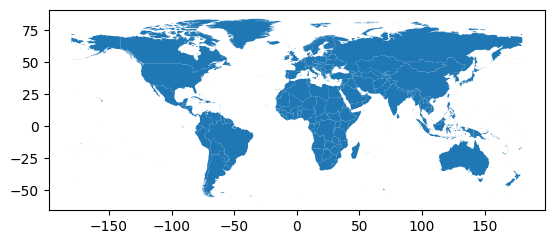

In [387]:
map_df.plot()

## Leitura do CSV com a população e o número de refugiados de cada país

In [388]:
file_path = 'ukraine-russia-refugees-2024.csv'

df = pd.read_csv(file_path, sep=',')

#selecting the columns required
df = df[['Country','Number of Refugees (15/01/2024)']]
#renaming the column name
data_for_map = df.rename(index=str, columns={'Country': 'country','Number of Refugees (15/01/2024)': 'numb_of_refugees'})

data_for_map.head()

,country,numb_of_refugees
0,Germany,1125850
1,Poland,956633
2,Czech Republic,375588
3,United Kingdom,250361
4,Spain,199154


## Trata os dados do dataset para alterando os valores de United Kingdom e Moldova

In [389]:
data_map = data_for_map.copy()

index_uk = data_map[data_map['country'] == 'United Kingdom'].index[0]
index_moldova = data_map[data_map['country'] == 'Moldova'].index[0]

data_map.loc[index_uk, 'country'] = 'U.K. of Great Britain and Northern Ireland'
data_map.loc[index_moldova, 'country'] = 'Moldova, Republic of'
data_map.head()

,country,numb_of_refugees
0,Germany,1125850
1,Poland,956633
2,Czech Republic,375588
3,U.K. of Great Britain and Northern Ireland,250361
4,Spain,199154


## Reduzindo o dataframe apenas aos paises que existem refugiados

In [390]:
data_refugess = data_map[data_map['numb_of_refugees'] != 0]

data_refugess.head()

,country,numb_of_refugees
0,Germany,1125850
1,Poland,956633
2,Czech Republic,375588
3,U.K. of Great Britain and Northern Ireland,250361
4,Spain,199154


## Juntando os dados do dataset com os dados do shapefile

In [391]:
merged = map_df.set_index('name').join(data_refugess.set_index('country')).dropna()

merged.head()

,iso3,status,color_code,continent,region,iso_3166_1_,french_shor,geometry,numb_of_refugees
name,,,,,,,,,
Ireland,IRL,Member State,IRL,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53...",102561.0
Spain,ESP,Member State,ESP,Europe,Southern Europe,ES,Espagne,"MULTIPOLYGON (((-17.91125 27.77375, -17.96389 ...",199154.0
Cyprus,CYP,Member State,CYP,Asia,Western Asia,CY,Chypre,"POLYGON ((34.12000 35.40083, 33.95805 35.31277...",18232.0
Switzerland,CHE,Member State,CHE,Europe,Western Europe,CH,Suisse,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ...",66479.0
Austria,AUT,Member State,AUT,Europe,Western Europe,AT,Autriche,"POLYGON ((16.94618 48.61907, 16.94333 48.57333...",83981.0


## Plotando o mapa com a relação da quantidade de refugiados

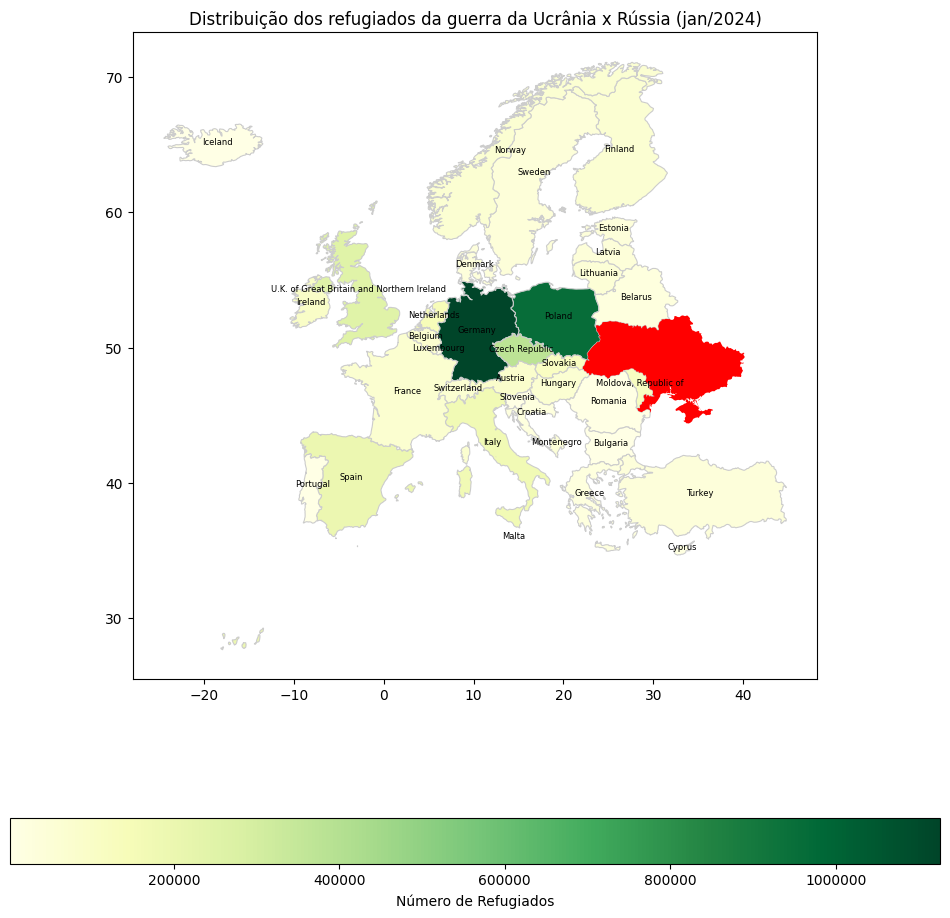

In [393]:
variable = 'numb_of_refugees'
vmin, vmax = min(merged['numb_of_refugees']), max(merged['numb_of_refugees'])

fig, ax = plt.subplots(1, figsize=(12, 12))

# Barra de cores para legenda
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, ax=plt.gca(), orientation="horizontal", label="Número de Refugiados",
                    format="%i")

# Plot do mapa das regiões de interesse, classificado pelo numero de refugiados
merged.plot(column=variable, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8')

# Adiciona o plot do mapa da Ukrania e destaca de vermelho
ukraine = map_df[map_df['name'] == 'Ukraine']
ukraine.plot(color='red', ax=ax)

# Nomeia cada pais com seus respectivos nomes
for idx, row in merged.iterrows():
    plt.annotate(text=idx, xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=6)

plt.title("Distribuição dos refugiados da guerra da Ucrânia x Rússia (jan/2024)")
plt.show()

## Conclusão

- Podemos notar que os paises que mais receberam refugiados foram a Polônia e a Alemanha